In [15]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [16]:
df = pd.read_csv("AmesHousing.csv")
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


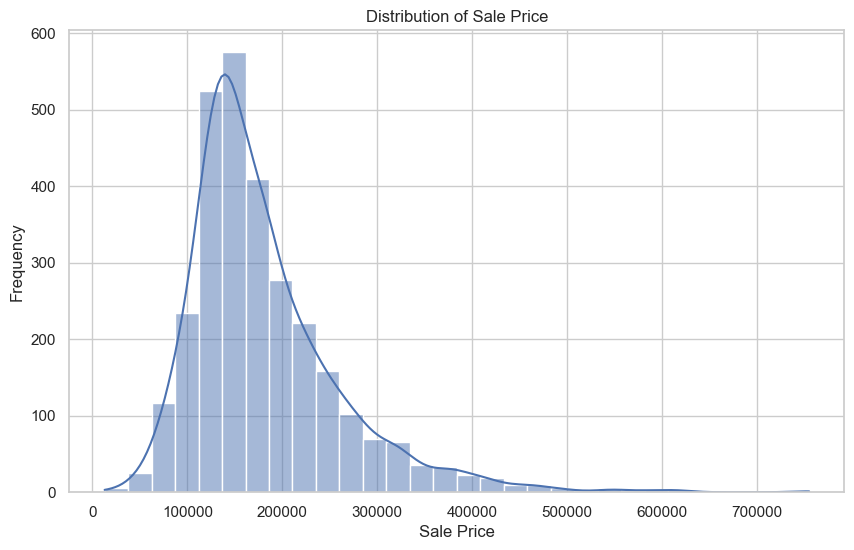

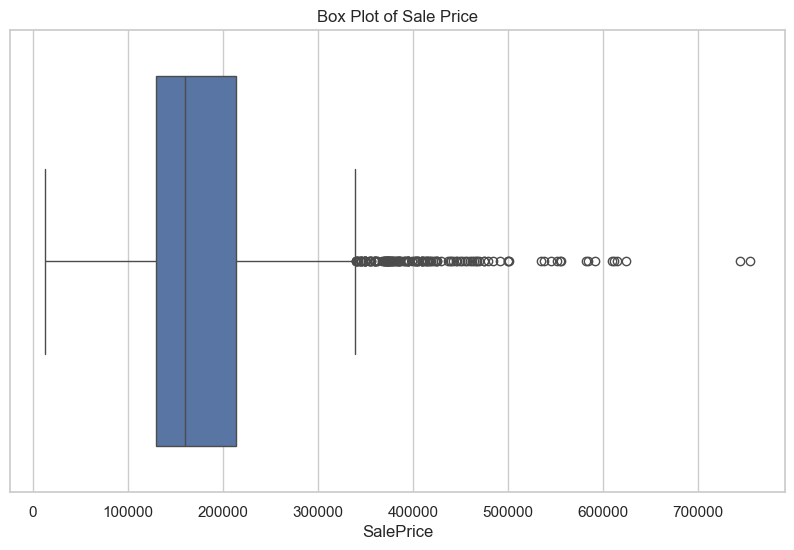

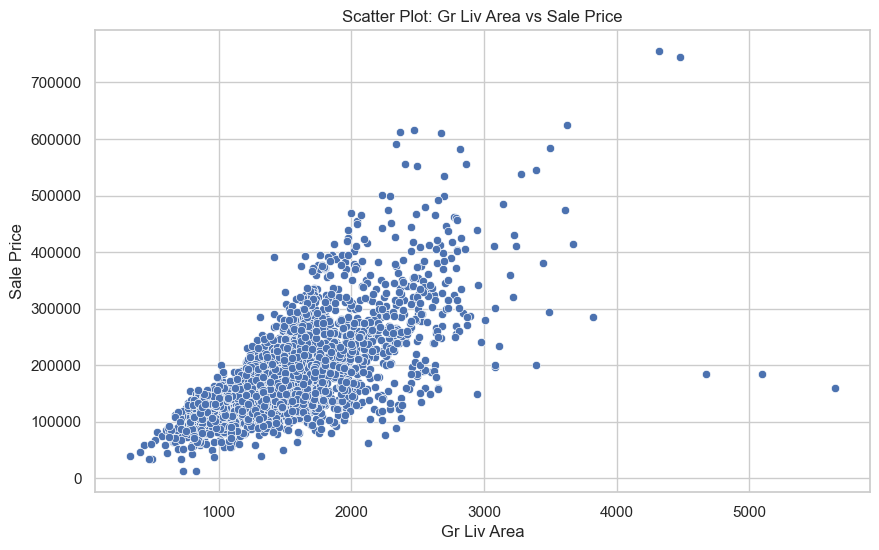

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Histogram of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot for SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Box Plot of Sale Price')
plt.show()

# Scatter Plot: Gr Liv Area vs Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title('Scatter Plot: Gr Liv Area vs Sale Price')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.show()


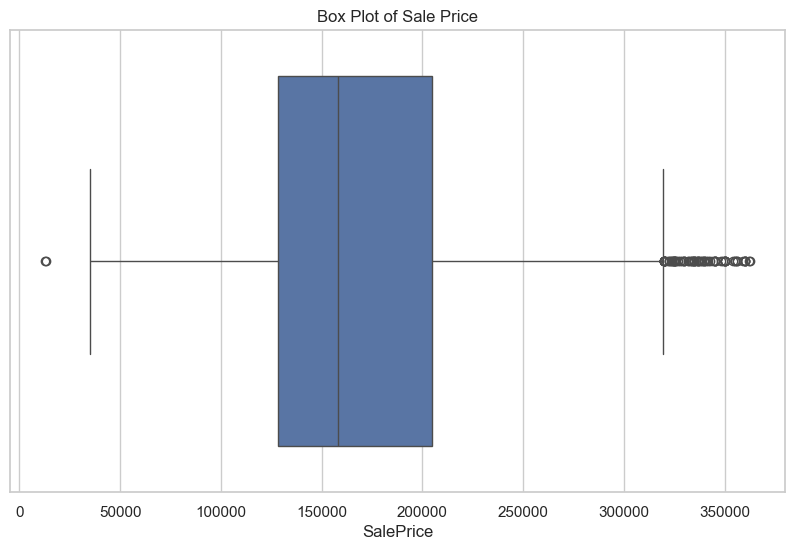

,index,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,5,141.000000,31770,1,0,3,...,0,0,0,0,0,5,2010,9,4,215000
1,1,2,526350040,20,4,80.000000,11622,1,3,3,...,0,0,120,0,0,6,2010,9,4,105000
2,2,3,526351010,20,5,81.000000,14267,1,0,3,...,0,0,0,0,12500,6,2010,9,4,172000
3,3,4,526353030,20,5,93.000000,11160,1,3,3,...,0,0,0,0,0,4,2010,9,4,244000
4,4,5,527105010,60,5,74.000000,13830,1,0,3,...,0,0,0,0,0,3,2010,9,4,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2925,2926,923275080,80,5,37.000000,7937,1,0,3,...,0,0,0,0,0,3,2006,9,4,142500
2810,2926,2927,923276100,20,5,68.823947,8885,1,0,2,...,0,0,0,0,0,6,2006,9,4,131000
2811,2927,2928,923400125,85,5,62.000000,10441,1,3,3,...,0,0,0,0,700,7,2006,9,4,132000
2812,2928,2929,924100070,20,5,77.000000,10010,1,3,3,...,0,0,0,0,0,4,2006,9,4,170000


In [31]:
# Box plot to identify outliers in Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Box Plot of Sale Price')
plt.show()

# Handling outliers: Removing outliers based on z-score
from scipy import stats

z_scores = np.abs(stats.zscore(df['SalePrice']))
df_no_outliers = df[(z_scores < 3)]  # Keep data within 3 standard deviations
df = df_no_outliers
df = df.reset_index()
df

In [32]:
# List of columns fill NaN values with their means
features = ['Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Screen Porch', 'Lot Frontage', '1st Flr SF', 'Gr Liv Area']

# Fill NaN values in the specified columns with their column mean in one go
df[features] = df[features].fillna(df[features].mean())
df

,index,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,5,141.000000,31770,1,0,3,...,0,0,0,0,0,5,2010,9,4,215000
1,1,2,526350040,20,4,80.000000,11622,1,3,3,...,0,0,120,0,0,6,2010,9,4,105000
2,2,3,526351010,20,5,81.000000,14267,1,0,3,...,0,0,0,0,12500,6,2010,9,4,172000
3,3,4,526353030,20,5,93.000000,11160,1,3,3,...,0,0,0,0,0,4,2010,9,4,244000
4,4,5,527105010,60,5,74.000000,13830,1,0,3,...,0,0,0,0,0,3,2010,9,4,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2925,2926,923275080,80,5,37.000000,7937,1,0,3,...,0,0,0,0,0,3,2006,9,4,142500
2810,2926,2927,923276100,20,5,68.823947,8885,1,0,2,...,0,0,0,0,0,6,2006,9,4,131000
2811,2927,2928,923400125,85,5,62.000000,10441,1,3,3,...,0,0,0,0,700,7,2006,9,4,132000
2812,2928,2929,924100070,20,5,77.000000,10010,1,3,3,...,0,0,0,0,0,4,2006,9,4,170000


In [33]:
# Removing the coloumns
df.dropna(axis=1,inplace = True,how='any')
df

,index,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,5,141.000000,31770,1,0,3,...,0,0,0,0,0,5,2010,9,4,215000
1,1,2,526350040,20,4,80.000000,11622,1,3,3,...,0,0,120,0,0,6,2010,9,4,105000
2,2,3,526351010,20,5,81.000000,14267,1,0,3,...,0,0,0,0,12500,6,2010,9,4,172000
3,3,4,526353030,20,5,93.000000,11160,1,3,3,...,0,0,0,0,0,4,2010,9,4,244000
4,4,5,527105010,60,5,74.000000,13830,1,0,3,...,0,0,0,0,0,3,2010,9,4,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2925,2926,923275080,80,5,37.000000,7937,1,0,3,...,0,0,0,0,0,3,2006,9,4,142500
2810,2926,2927,923276100,20,5,68.823947,8885,1,0,2,...,0,0,0,0,0,6,2006,9,4,131000
2811,2927,2928,923400125,85,5,62.000000,10441,1,3,3,...,0,0,0,0,700,7,2006,9,4,132000
2812,2928,2929,924100070,20,5,77.000000,10010,1,3,3,...,0,0,0,0,0,4,2006,9,4,170000


In [34]:
# Encoding :

cols = df.select_dtypes(include='object').columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

df

,index,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,5,141.000000,31770,1,0,3,...,0,0,0,0,0,5,2010,9,4,215000
1,1,2,526350040,20,4,80.000000,11622,1,3,3,...,0,0,120,0,0,6,2010,9,4,105000
2,2,3,526351010,20,5,81.000000,14267,1,0,3,...,0,0,0,0,12500,6,2010,9,4,172000
3,3,4,526353030,20,5,93.000000,11160,1,3,3,...,0,0,0,0,0,4,2010,9,4,244000
4,4,5,527105010,60,5,74.000000,13830,1,0,3,...,0,0,0,0,0,3,2010,9,4,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2925,2926,923275080,80,5,37.000000,7937,1,0,3,...,0,0,0,0,0,3,2006,9,4,142500
2810,2926,2927,923276100,20,5,68.823947,8885,1,0,2,...,0,0,0,0,0,6,2006,9,4,131000
2811,2927,2928,923400125,85,5,62.000000,10441,1,3,3,...,0,0,0,0,700,7,2006,9,4,132000
2812,2928,2929,924100070,20,5,77.000000,10010,1,3,3,...,0,0,0,0,0,4,2006,9,4,170000


In [35]:
# dividing data into dependent and independent
X = df.drop("SalePrice",axis = 1)
y = df["SalePrice"]

# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardize the data and convert back to a DataFrame, keeping the original column names
df_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_standardized

,index,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,-1.732540,-1.732540,-1.023663,-0.883533,0.038015,3.501979,3.221293,0.065442,-1.402940,0.304463,...,0.241088,-0.365261,-0.102108,-0.279363,-0.060184,-0.091262,-0.444301,1.672110,0.323592,0.224555
1,-1.731359,-1.731359,-1.023404,-0.883533,-1.099996,0.563718,0.257163,0.065442,0.734126,0.304463,...,-0.685657,-0.365261,-0.102108,1.907716,-0.060184,-0.091262,-0.074947,1.672110,0.323592,0.224555
2,-1.730178,-1.730178,-1.023399,-0.883533,0.038015,0.611886,0.646290,0.065442,-1.402940,0.304463,...,-0.147547,-0.365261,-0.102108,-0.279363,-0.060184,21.546057,-0.074947,1.672110,0.323592,0.224555
3,-1.728997,-1.728997,-1.023388,-0.883533,0.038015,1.189905,0.189195,0.065442,0.734126,0.304463,...,-0.685657,-0.365261,-0.102108,-0.279363,-0.060184,-0.091262,-0.813655,1.672110,0.323592,0.224555
4,-1.727816,-1.727816,-1.019402,0.045867,0.038015,0.274709,0.581999,0.065442,-1.402940,0.304463,...,-0.177442,-0.365261,-0.102108,-0.279363,-0.060184,-0.091262,-1.183008,1.672110,0.323592,0.224555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,1.722298,1.722298,1.080668,0.510567,0.038015,-1.507515,-0.284966,0.065442,-1.402940,0.304463,...,-0.685657,-0.365261,-0.102108,-0.279363,-0.060184,-0.091262,-1.183008,-1.363579,0.323592,0.224555
2810,1.723479,1.723479,1.080673,-0.883533,0.038015,0.025388,-0.145498,0.065442,-1.402940,-1.135467,...,-0.685657,-0.365261,-0.102108,-0.279363,-0.060184,-0.091262,-0.074947,-1.363579,0.323592,0.224555
2811,1.724660,1.724660,1.081331,0.626742,0.038015,-0.303310,0.083417,0.065442,0.734126,0.304463,...,-0.207337,-0.365261,-0.102108,-0.279363,-0.060184,1.120428,0.294407,-1.363579,0.323592,0.224555
2812,1.725841,1.725841,1.085041,-0.883533,0.038015,0.419213,0.020009,0.065442,0.734126,0.304463,...,-0.117652,-0.365261,-0.102108,-0.279363,-0.060184,-0.091262,-0.813655,-1.363579,0.323592,0.224555


In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [37]:
model = linear_model.LinearRegression()

model.fit(X_train,y_train)
print("Slope / coffeint " ,model.coef_[0])
print("Intercet ", model.intercept_)

Slope / coffeint  1.9439805639010206
Intercet  -4484704.751192044


MSE :  854375388.2285379
R2 _ Score :  0.7904306564754642
MAE: 17323.095891698467


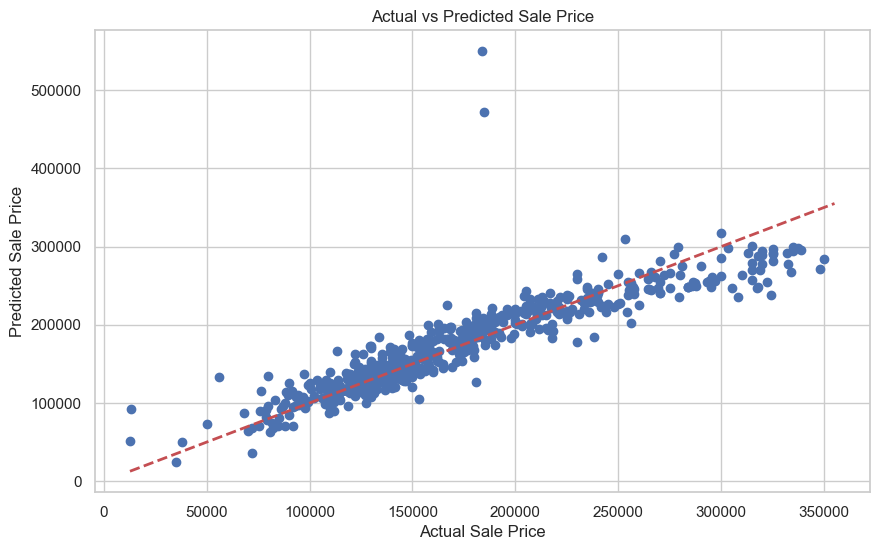

In [38]:
y_pred = model.predict(X_test)

# Checking Accuracy
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
print("MSE : ",mse)
r2 = r2_score(y_test,y_pred)
print("R2 _ Score : ",r2)

from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Visualizing Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()


In [39]:
temp = df.loc[(23,24), : ]

In [40]:

temp = temp.drop(columns='SalePrice',axis = 1)
temp

,index,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
23,25,26,527403020,20,5,65.0,8450,1,3,3,...,85,184,0,0,0,0,7,2010,9,4
24,26,27,527404120,20,5,70.0,8400,1,3,3,...,0,0,0,0,0,0,4,2010,9,4


In [28]:
pred = model.predict(temp)
pred

array([150635.6063002 , 146563.49034268])